## Comparing Natural Products Mass Spectra Using Python and Matchms in Anaconda and Jupyter Notebooks

### Install matchms using pip install matchms

In [1]:
pip install matchms

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from matchms.importing import load_from_mgf

In [3]:
# Importing the MS/MS data from GNPS website https://gnps-external.ucsd.edu/gnpslibrary
data = "/Users/cmqui/OneDrive/Desktop/"
file_mgf = os.path.join (data, "GNPS-NIH-NATURALPRODUCTSLIBRARY.mgf" )
spectrums = list(load_from_mgf(file_mgf))

### Inspecting the data, number of spectrums, peaks per spectrum


In [4]:
len(spectrums)

1267

Text(0, 0.5, 'Number of spectrums')

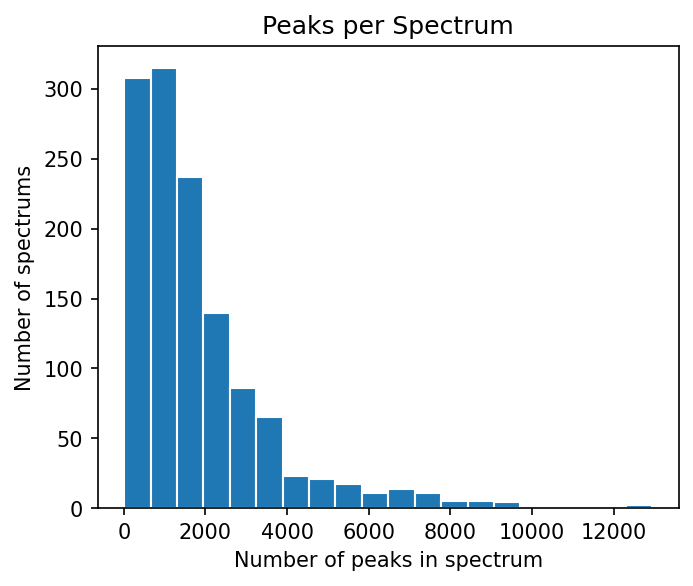

In [5]:
number_of_peaks = [len(s.peaks.mz) for s in spectrums]
from matplotlib import pyplot as plt
plt.figure (figsize=(5,4), dpi=150)
plt.hist (number_of_peaks, 20, edgecolor= 'white')
plt.title ('Peaks per Spectrum')
plt.xlabel('Number of peaks in spectrum')
plt.ylabel('Number of spectrums')

#### This indicates that most spectra contain many peaks, most of them of low intensity

### Building a data processing pipeline, using matchms.filtering to:
- Harmonize, clean, extend and/or check the spectrum metadata
- Process or filter spectrum peaks (e.g. remove low intensity peaks, or normalize peak intensities)

In [6]:
# To make metadata entries more consistent (default_filters)
# To repair and translate chemical indentifiers (repair_inchi_inchikey_smiles)  

import matchms.filtering as ms_filters

def metadata_processing(spectrum):
    spectrum = ms_filters.default_filters(spectrum)
    spectrum = ms_filters.repair_inchi_inchikey_smiles(spectrum)
    spectrum = ms_filters.derive_inchi_from_smiles(spectrum)
    spectrum = ms_filters.derive_smiles_from_inchi(spectrum)
    spectrum = ms_filters.derive_inchikey_from_inchi(spectrum)
    spectrum = ms_filters.harmonize_undefined_smiles(spectrum)
    spectrum = ms_filters.harmonize_undefined_inchi(spectrum)
    spectrum = ms_filters.harmonize_undefined_inchikey(spectrum)
    spectrum = ms_filters.add_precursor_mz(spectrum)
    return spectrum

In [7]:
# To normalize the intensity to > 0.01 and a m/z position between 10 and 1000 Da
def peak_processing(spectrum):
    spectrum = ms_filters.default_filters(spectrum)
    spectrum = ms_filters.normalize_intensities(spectrum)
    spectrum = ms_filters.select_by_intensity(spectrum, intensity_from=0.01)
    spectrum = ms_filters.select_by_mz(spectrum, mz_from=10, mz_to=1000)
    return spectrum


In [8]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [9]:
spectrums = [metadata_processing(s) for s in spectrums]
spectrums = [peak_processing(s) for s in spectrums]

2022-11-27 16:25:49,768:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 408.156 with new one: 408.156
2022-11-27 16:25:49,782:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 277.098 with new one: 277.098
2022-11-27 16:25:49,793:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 269.081 with new one: 269.081
2022-11-27 16:25:49,804:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 492.177 with new one: 492.177
2022-11-27 16:25:49,817:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 481.245 with new one: 481.245
2022-11-27 16:25:49,831:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 361.129 with new one: 361.129
2022-11-27 16:25:49,842:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 486.192 with new one: 486.192
2022-11-27 16:25:49,857:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 204.102 with new one: 204.102
2022-11-27 16:25:49,870:

[16:25:49] WARNING: Omitted undefined stereo

[16:25:49] WARNING: Omitted undefined stereo



2022-11-27 16:25:50,036:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 426.192 with new one: 426.192
2022-11-27 16:25:50,047:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 458.218 with new one: 458.218
2022-11-27 16:25:50,059:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 389.182 with new one: 389.182
2022-11-27 16:25:50,073:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 386.154 with new one: 386.154
2022-11-27 16:25:50,084:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 385.126 with new one: 385.126
2022-11-27 16:25:50,096:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 363.144 with new one: 363.144
2022-11-27 16:25:50,107:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 393.131 with new one: 393.131
2022-11-27 16:25:50,118:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 253.228 with new one: 253.228
2022-11-27 16:25:50,129:

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo



2022-11-27 16:25:50,213:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 402.203 with new one: 402.203
2022-11-27 16:25:50,228:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 374.16 with new one: 374.16
2022-11-27 16:25:50,241:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 448.187 with new one: 448.187
2022-11-27 16:25:50,254:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 437.208 with new one: 437.208
2022-11-27 16:25:50,266:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 481.153 with new one: 481.153
2022-11-27 16:25:50,279:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 438.192 with new one: 438.192
2022-11-27 16:25:50,291:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 577.245 with new one: 577.245
2022-11-27 16:25:50,304:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 516.217 with new one: 516.217
2022-11-27 16:25:50,318:WA

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo



2022-11-27 16:25:50,550:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 408.192 with new one: 408.192
2022-11-27 16:25:50,566:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 433.223 with new one: 433.223
2022-11-27 16:25:50,578:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 439.218 with new one: 439.218
2022-11-27 16:25:50,589:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 353.186 with new one: 353.186
2022-11-27 16:25:50,602:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 416.207 with new one: 416.207
2022-11-27 16:25:50,613:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 317.066 with new one: 317.066
2022-11-27 16:25:50,623:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 442.147 with new one: 442.147
2022-11-27 16:25:50,635:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 206.118 with new one: 206.118
2022-11-27 16:25:50,647:

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo

[16:25:50] WARNING: Omitted undefined stereo



2022-11-27 16:25:50,770:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 317.103 with new one: 317.103
2022-11-27 16:25:50,782:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 421.176 with new one: 421.176
2022-11-27 16:25:50,795:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 963.492 with new one: 963.492
2022-11-27 16:25:50,808:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 447.192 with new one: 447.192
2022-11-27 16:25:50,821:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 271.097 with new one: 271.097
2022-11-27 16:25:50,832:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 285.113 with new one: 285.113
2022-11-27 16:25:50,843:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 461.208 with new one: 461.208
2022-11-27 16:25:50,855:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 565.209 with new one: 565.209
2022-11-27 16:25:50,869:

[16:25:50] WARNING: Omitted undefined stereo



2022-11-27 16:25:50,984:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 472.176 with new one: 472.176
2022-11-27 16:25:50,998:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 435.192 with new one: 435.192
2022-11-27 16:25:51,008:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 466.223 with new one: 466.223
2022-11-27 16:25:51,021:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 510.26 with new one: 510.26
2022-11-27 16:25:51,034:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 532.242 with new one: 532.242
2022-11-27 16:25:51,046:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 621.255 with new one: 621.255
2022-11-27 16:25:51,058:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 643.236 with new one: 643.236
2022-11-27 16:25:51,071:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 239.071 with new one: 239.071
2022-11-27 16:25:51,081:WA

[16:25:50] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo



2022-11-27 16:25:51,185:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 484.153 with new one: 484.153
2022-11-27 16:25:51,198:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 374.16 with new one: 374.16
2022-11-27 16:25:51,208:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 422.16 with new one: 422.16
2022-11-27 16:25:51,222:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 220.113 with new one: 220.113
2022-11-27 16:25:51,236:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 481.153 with new one: 481.153
2022-11-27 16:25:51,247:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 467.137 with new one: 467.137
2022-11-27 16:25:51,260:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 391.166 with new one: 391.166
2022-11-27 16:25:51,271:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 361.129 with new one: 361.129
2022-11-27 16:25:51,282:WARN

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo



2022-11-27 16:25:51,538:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 271.097 with new one: 271.097
2022-11-27 16:25:51,549:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 206.082 with new one: 206.082
2022-11-27 16:25:51,560:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 456.348 with new one: 456.348
2022-11-27 16:25:51,571:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 360.145 with new one: 360.145
2022-11-27 16:25:51,584:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 456.148 with new one: 456.148
2022-11-27 16:25:51,596:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 396.145 with new one: 396.145
2022-11-27 16:25:51,607:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 462.203 with new one: 462.203
2022-11-27 16:25:51,619:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 323.02 with new one: 323.02
2022-11-27 16:25:51,630:WA

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Charges were rearranged

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo



2022-11-27 16:25:51,724:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 332.186 with new one: 332.186
2022-11-27 16:25:51,736:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 460.224 with new one: 460.224
2022-11-27 16:25:51,748:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 480.202 with new one: 480.202
2022-11-27 16:25:51,760:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 450.192 with new one: 450.192
2022-11-27 16:25:51,772:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 240.066 with new one: 240.066
2022-11-27 16:25:51,783:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 220.977 with new one: 220.977
2022-11-27 16:25:51,792:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 388.176 with new one: 388.176
2022-11-27 16:25:51,804:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 457.186 with new one: 457.186
2022-11-27 16:25:51,816:

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo



2022-11-27 16:25:51,920:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 441.155 with new one: 441.155
2022-11-27 16:25:51,932:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 452.09 with new one: 452.09
2022-11-27 16:25:51,943:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 492.239 with new one: 492.239
2022-11-27 16:25:51,956:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 271.061 with new one: 271.061
2022-11-27 16:25:51,971:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 330.207 with new one: 330.207
2022-11-27 16:25:51,987:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 549.214 with new one: 549.214
2022-11-27 16:25:52,004:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 489.212 with new one: 489.212
2022-11-27 16:25:52,019:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 259.097 with new one: 259.097
2022-11-27 16:25:52,031:WA

[16:25:51] WARNING: Omitted undefined stereo

[16:25:51] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo



2022-11-27 16:25:52,116:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 448.185 with new one: 448.185
2022-11-27 16:25:52,129:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 395.197 with new one: 395.197
2022-11-27 16:25:52,142:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 444.121 with new one: 444.121
2022-11-27 16:25:52,155:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 492.225 with new one: 492.225
2022-11-27 16:25:52,169:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 416.207 with new one: 416.207
2022-11-27 16:25:52,181:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 455.137 with new one: 455.137
2022-11-27 16:25:52,193:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 439.235 with new one: 439.235
2022-11-27 16:25:52,206:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 422.16 with new one: 422.16
2022-11-27 16:25:52,224:WA

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo



2022-11-27 16:25:52,303:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 470.137 with new one: 470.137
2022-11-27 16:25:52,316:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 339.171 with new one: 339.171
2022-11-27 16:25:52,329:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 402.074 with new one: 402.074
2022-11-27 16:25:52,340:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 414.149 with new one: 414.149
2022-11-27 16:25:52,353:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 477.214 with new one: 477.214
2022-11-27 16:25:52,367:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 499.195 with new one: 499.195
2022-11-27 16:25:52,380:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 283.097 with new one: 283.097
2022-11-27 16:25:52,391:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 479.269 with new one: 479.269
2022-11-27 16:25:52,404:

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo



2022-11-27 16:25:52,514:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 446.16 with new one: 446.16
2022-11-27 16:25:52,527:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 353.066 with new one: 353.066
2022-11-27 16:25:52,538:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 220.12 with new one: 220.12
2022-11-27 16:25:52,549:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 333.097 with new one: 333.097
2022-11-27 16:25:52,560:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 414.228 with new one: 414.228
2022-11-27 16:25:52,571:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 407.161 with new one: 407.161
2022-11-27 16:25:52,586:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 464.207 with new one: 464.207
2022-11-27 16:25:52,603:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 370.165 with new one: 370.165
2022-11-27 16:25:52,614:WARN

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo



2022-11-27 16:25:52,725:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 422.05 with new one: 422.05
2022-11-27 16:25:52,738:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 464.23 with new one: 464.23
2022-11-27 16:25:52,754:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 388.066 with new one: 388.066
2022-11-27 16:25:52,766:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 435.156 with new one: 435.156
2022-11-27 16:25:52,779:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 416.15 with new one: 416.15
2022-11-27 16:25:52,790:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 450.192 with new one: 450.192
2022-11-27 16:25:52,807:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 217.05 with new one: 217.05
2022-11-27 16:25:52,819:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 400.212 with new one: 400.212
2022-11-27 16:25:52,832:WARNING:

[16:25:52] WARNING: Omitted undefined stereo

[16:25:52] WARNING: Omitted undefined stereo



2022-11-27 16:25:52,917:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 454.223 with new one: 454.223
2022-11-27 16:25:52,930:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 436.176 with new one: 436.176
2022-11-27 16:25:52,944:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 355.118 with new one: 355.118
2022-11-27 16:25:52,955:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 275.092 with new one: 275.092
2022-11-27 16:25:52,968:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 449.208 with new one: 449.208
2022-11-27 16:25:52,982:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 384.138 with new one: 384.138
2022-11-27 16:25:52,998:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 423.24 with new one: 423.24
2022-11-27 16:25:53,012:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 444.239 with new one: 444.239
2022-11-27 16:25:53,024:WA

[16:25:52] WARNING: Omitted undefined stereo



2022-11-27 16:25:53,098:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 188.082 with new one: 188.082
2022-11-27 16:25:53,109:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 511.223 with new one: 511.223
2022-11-27 16:25:53,123:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 445.176 with new one: 445.176
2022-11-27 16:25:53,137:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 439.223 with new one: 439.223
2022-11-27 16:25:53,151:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 412.169 with new one: 412.169
2022-11-27 16:25:53,168:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 510.26 with new one: 510.26
2022-11-27 16:25:53,183:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 418.129 with new one: 418.129
2022-11-27 16:25:53,197:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 416.207 with new one: 416.207
2022-11-27 16:25:53,209:WA

[16:25:53] WARNING: Omitted undefined stereo

[16:25:53] WARNING: Omitted undefined stereo

[16:25:53] WARNING: Omitted undefined stereo

[16:25:53] WARNING: Omitted undefined stereo



2022-11-27 16:25:53,534:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 380.143 with new one: 380.143
2022-11-27 16:25:53,546:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 280.097 with new one: 280.097
2022-11-27 16:25:53,557:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 536.215 with new one: 536.215
2022-11-27 16:25:53,571:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 507.224 with new one: 507.224
2022-11-27 16:25:53,587:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 564.261 with new one: 564.261
2022-11-27 16:25:53,601:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 440.219 with new one: 440.219
2022-11-27 16:25:53,613:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 151.062 with new one: 151.062
2022-11-27 16:25:53,623:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 436.198 with new one: 436.198
2022-11-27 16:25:53,634:

[16:25:53] WARNING: Omitted undefined stereo

[16:25:53] WARNING: Omitted undefined stereo

[16:25:53] WARNING: Omitted undefined stereo

[16:25:53] WARNING: Omitted undefined stereo

[16:25:53] WARNING: Omitted undefined stereo



2022-11-27 16:25:54,032:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 260.092 with new one: 260.092
2022-11-27 16:25:54,043:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 481.26 with new one: 481.26
2022-11-27 16:25:54,056:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 539.098 with new one: 539.098
2022-11-27 16:25:54,072:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 434.208 with new one: 434.208
2022-11-27 16:25:54,084:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 266.139 with new one: 266.139
2022-11-27 16:25:54,096:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 558.151 with new one: 558.151
2022-11-27 16:25:54,107:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 424.176 with new one: 424.176
2022-11-27 16:25:54,121:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 550.245 with new one: 550.245
2022-11-27 16:25:54,136:WA

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo



2022-11-27 16:25:54,295:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 414.218 with new one: 414.218
2022-11-27 16:25:54,307:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 423.24 with new one: 423.24
2022-11-27 16:25:54,320:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 500.266 with new one: 500.266
2022-11-27 16:25:54,332:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 465.166 with new one: 465.166
2022-11-27 16:25:54,344:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 474.214 with new one: 474.214
2022-11-27 16:25:54,356:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 422.172 with new one: 422.172
2022-11-27 16:25:54,368:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 372.118 with new one: 372.118
2022-11-27 16:25:54,380:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 241.17 with new one: 241.17
2022-11-27 16:25:54,390:WARN

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo



2022-11-27 16:25:54,539:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 331.119 with new one: 331.119
2022-11-27 16:25:54,551:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 512.184 with new one: 512.184
2022-11-27 16:25:54,564:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 581.187 with new one: 581.187
2022-11-27 16:25:54,578:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 245.096 with new one: 245.096
2022-11-27 16:25:54,590:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 423.192 with new one: 423.192
2022-11-27 16:25:54,602:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 507.224 with new one: 507.224
2022-11-27 16:25:54,617:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 487.342 with new one: 487.342
2022-11-27 16:25:54,631:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 509.324 with new one: 509.324
2022-11-27 16:25:54,643:

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo



2022-11-27 16:25:54,737:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 243.15 with new one: 243.15
2022-11-27 16:25:54,748:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 352.118 with new one: 352.118
2022-11-27 16:25:54,758:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 481.245 with new one: 481.245
2022-11-27 16:25:54,771:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 414.192 with new one: 414.192
2022-11-27 16:25:54,783:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 492.225 with new one: 492.225
2022-11-27 16:25:54,796:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 409.176 with new one: 409.176
2022-11-27 16:25:54,807:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 397.151 with new one: 397.151
2022-11-27 16:25:54,819:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 355.202 with new one: 355.202
2022-11-27 16:25:54,832:WA

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Charges were rearranged; Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo

[16:25:54] WARNING: Omitted undefined stereo



2022-11-27 16:25:55,017:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 402.192 with new one: 402.192
2022-11-27 16:25:55,032:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 430.223 with new one: 430.223
2022-11-27 16:25:55,045:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 464.23 with new one: 464.23
2022-11-27 16:25:55,057:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 318.113 with new one: 318.113
2022-11-27 16:25:55,070:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 466.161 with new one: 466.161
2022-11-27 16:25:55,082:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 313.135 with new one: 313.135
2022-11-27 16:25:55,093:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 249.076 with new one: 249.076
2022-11-27 16:25:55,104:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 440.171 with new one: 440.171
2022-11-27 16:25:55,116:WA

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo



2022-11-27 16:25:55,309:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 391.096 with new one: 391.096
2022-11-27 16:25:55,321:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 449.199 with new one: 449.199
2022-11-27 16:25:55,333:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 283.097 with new one: 283.097
2022-11-27 16:25:55,345:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 430.165 with new one: 430.165
2022-11-27 16:25:55,356:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 457.14 with new one: 457.14
2022-11-27 16:25:55,369:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 486.155 with new one: 486.155
2022-11-27 16:25:55,382:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 335.259 with new one: 335.259
2022-11-27 16:25:55,392:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 565.156 with new one: 565.156
2022-11-27 16:25:55,405:WA

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo



2022-11-27 16:25:55,535:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 508.248 with new one: 508.248
2022-11-27 16:25:55,549:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 239.071 with new one: 239.071
2022-11-27 16:25:55,559:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 500.148 with new one: 500.148
2022-11-27 16:25:55,572:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 338.187 with new one: 338.187
2022-11-27 16:25:55,584:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 938.417 with new one: 938.417
2022-11-27 16:25:55,600:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 960.399 with new one: 960.399
2022-11-27 16:25:55,615:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 356.113 with new one: 356.113
2022-11-27 16:25:55,626:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 477.203 with new one: 477.203
2022-11-27 16:25:55,639:

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo



2022-11-27 16:25:55,746:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 569.159 with new one: 569.159
2022-11-27 16:25:55,758:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 493.197 with new one: 493.197
2022-11-27 16:25:55,771:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 395.134 with new one: 395.134
2022-11-27 16:25:55,783:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 451.271 with new one: 451.271
2022-11-27 16:25:55,795:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 326.139 with new one: 326.139
2022-11-27 16:25:55,806:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 372.145 with new one: 372.145
2022-11-27 16:25:55,818:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 417.229 with new one: 417.229
2022-11-27 16:25:55,829:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 163.1 with new one: 163.1
2022-11-27 16:25:55,840:WARN

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo

[16:25:55] WARNING: Omitted undefined stereo



2022-11-27 16:25:55,955:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 283.097 with new one: 283.097
2022-11-27 16:25:55,967:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 335.222 with new one: 335.222
2022-11-27 16:25:55,979:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 426.203 with new one: 426.203
2022-11-27 16:25:55,991:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 389.182 with new one: 389.182
2022-11-27 16:25:56,017:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 311.103 with new one: 311.103
2022-11-27 16:25:56,029:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 387.192 with new one: 387.192
2022-11-27 16:25:56,040:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 239.071 with new one: 239.071
2022-11-27 16:25:56,051:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 253.086 with new one: 253.086
2022-11-27 16:25:56,063:

[16:25:56] WARNING: Omitted undefined stereo

[16:25:56] WARNING: Omitted undefined stereo



2022-11-27 16:25:56,283:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 443.145 with new one: 443.145
2022-11-27 16:25:56,295:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 437.16 with new one: 437.16
2022-11-27 16:25:56,307:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 297.088 with new one: 297.088
2022-11-27 16:25:56,319:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 374.16 with new one: 374.16
2022-11-27 16:25:56,330:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 401.208 with new one: 401.208
2022-11-27 16:25:56,341:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 408.145 with new one: 408.145
2022-11-27 16:25:56,354:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 653.245 with new one: 653.245
2022-11-27 16:25:56,366:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 675.226 with new one: 675.226
2022-11-27 16:25:56,380:WARN

[16:25:56] WARNING: Omitted undefined stereo



2022-11-27 16:25:56,505:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 354.171 with new one: 354.171
2022-11-27 16:25:56,521:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 404.161 with new one: 404.161
2022-11-27 16:25:56,533:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 271.097 with new one: 271.097
2022-11-27 16:25:56,543:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 289.071 with new one: 289.071
2022-11-27 16:25:56,553:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 453.229 with new one: 453.229
2022-11-27 16:25:56,567:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 409.176 with new one: 409.176
2022-11-27 16:25:56,579:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 587.34 with new one: 587.34
2022-11-27 16:25:56,589:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 397.151 with new one: 397.151
2022-11-27 16:25:56,603:WA

[16:25:56] WARNING: Omitted undefined stereo

[16:25:56] WARNING: Omitted undefined stereo

[16:25:56] WARNING: Omitted undefined stereo



2022-11-27 16:25:56,714:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 571.288 with new one: 571.288
2022-11-27 16:25:56,725:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 392.113 with new one: 392.113
2022-11-27 16:25:56,737:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 529.245 with new one: 529.245
2022-11-27 16:25:56,751:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 487.198 with new one: 487.198
2022-11-27 16:25:56,764:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 409.224 with new one: 409.224
2022-11-27 16:25:56,775:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 302.139 with new one: 302.139
2022-11-27 16:25:56,786:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 471.202 with new one: 471.202
2022-11-27 16:25:56,799:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 414.155 with new one: 414.155
2022-11-27 16:25:56,812:

[16:25:56] WARNING: Omitted undefined stereo

[16:25:56] WARNING: Omitted undefined stereo

[16:25:56] WARNING: Omitted undefined stereo

[16:25:56] WARNING: Proton(s) added/removed

[16:25:56] WARNING: Omitted undefined stereo



2022-11-27 16:25:56,890:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 380.15 with new one: 380.15
2022-11-27 16:25:56,903:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 498.217 with new one: 498.217
2022-11-27 16:25:56,916:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 436.176 with new one: 436.176
2022-11-27 16:25:56,928:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 287.056 with new one: 287.056
2022-11-27 16:25:56,939:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 529.245 with new one: 529.245
2022-11-27 16:25:56,951:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 494.291 with new one: 494.291
2022-11-27 16:25:56,964:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 550.27 with new one: 550.27
2022-11-27 16:25:56,975:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 563.229 with new one: 563.229
2022-11-27 16:25:56,989:WARN

[16:25:56] WARNING: Omitted undefined stereo

[16:25:56] WARNING: Omitted undefined stereo

[16:25:57] WARNING: Omitted undefined stereo



2022-11-27 16:25:57,096:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 571.256 with new one: 571.256
2022-11-27 16:25:57,110:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 269.118 with new one: 269.118
2022-11-27 16:25:57,120:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 191.034 with new one: 191.034
2022-11-27 16:25:57,132:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 264.139 with new one: 264.139
2022-11-27 16:25:57,143:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 466.187 with new one: 466.187
2022-11-27 16:25:57,156:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 303.087 with new one: 303.087
2022-11-27 16:25:57,167:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 180.139 with new one: 180.139
2022-11-27 16:25:57,177:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 475.223 with new one: 475.223
2022-11-27 16:25:57,188:

[16:25:57] WARNING: Omitted undefined stereo

[16:25:57] WARNING: Omitted undefined stereo

[16:25:57] WARNING: Proton(s) added/removed

[16:25:57] WARNING: Omitted undefined stereo

[16:25:57] WARNING: Omitted undefined stereo

[16:25:57] WARNING: Omitted undefined stereo

[16:25:57] WARNING: Omitted undefined stereo



2022-11-27 16:25:57,348:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 360.181 with new one: 360.181
2022-11-27 16:25:57,359:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 402.182 with new one: 402.182
2022-11-27 16:25:57,370:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 542.313 with new one: 542.313
2022-11-27 16:25:57,385:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 578.277 with new one: 578.277
2022-11-27 16:25:57,398:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 458.054 with new one: 458.054
2022-11-27 16:25:57,410:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 480.035 with new one: 480.035
2022-11-27 16:25:57,421:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 156.081 with new one: 156.081
2022-11-27 16:25:57,432:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 433.176 with new one: 433.176
2022-11-27 16:25:57,444:

[16:25:57] WARNING: Omitted undefined stereo

[16:25:57] WARNING: Omitted undefined stereo

[16:25:57] WARNING: Omitted undefined stereo



2022-11-27 16:25:57,556:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 504.166 with new one: 504.166
2022-11-27 16:25:57,569:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 445.281 with new one: 445.281
2022-11-27 16:25:57,582:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 591.261 with new one: 591.261
2022-11-27 16:25:57,596:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 399.192 with new one: 399.192
2022-11-27 16:25:57,607:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 497.218 with new one: 497.218
2022-11-27 16:25:57,621:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 475.223 with new one: 475.223
2022-11-27 16:25:57,634:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 359.161 with new one: 359.161
2022-11-27 16:25:57,645:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 388.089 with new one: 388.089
2022-11-27 16:25:57,656:

[16:25:57] WARNING: Omitted undefined stereo

[16:25:57] WARNING: Omitted undefined stereo



2022-11-27 16:25:57,936:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 464.23 with new one: 464.23
2022-11-27 16:25:57,949:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 304.155 with new one: 304.155
2022-11-27 16:25:57,961:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 487.223 with new one: 487.223
2022-11-27 16:25:57,972:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 197.071 with new one: 197.071
2022-11-27 16:25:57,983:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 355.082 with new one: 355.082
2022-11-27 16:25:57,994:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 470.164 with new one: 470.164
2022-11-27 16:25:58,005:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 486.173 with new one: 486.173
2022-11-27 16:25:58,019:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 401.208 with new one: 401.208
2022-11-27 16:25:58,032:WA

[16:25:57] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo



2022-11-27 16:25:58,146:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 469.224 with new one: 469.224
2022-11-27 16:25:58,161:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 386.187 with new one: 386.187
2022-11-27 16:25:58,174:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 255.102 with new one: 255.102
2022-11-27 16:25:58,185:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 437.135 with new one: 437.135
2022-11-27 16:25:58,197:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 417.287 with new one: 417.287
2022-11-27 16:25:58,208:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 495.169 with new one: 495.169
2022-11-27 16:25:58,221:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 360.145 with new one: 360.145
2022-11-27 16:25:58,235:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 470.145 with new one: 470.145
2022-11-27 16:25:58,248:

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo



2022-11-27 16:25:58,364:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 324.145 with new one: 324.145
2022-11-27 16:25:58,374:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 329.139 with new one: 329.139
2022-11-27 16:25:58,385:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 371.186 with new one: 371.186
2022-11-27 16:25:58,396:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 327.16 with new one: 327.16
2022-11-27 16:25:58,406:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 339.171 with new one: 339.171
2022-11-27 16:25:58,418:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 431.208 with new one: 431.208
2022-11-27 16:25:58,431:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 386.197 with new one: 386.197
2022-11-27 16:25:58,443:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 521.24 with new one: 521.24
2022-11-27 16:25:58,455:WARN

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo



2022-11-27 16:25:58,555:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 447.203 with new one: 447.203
2022-11-27 16:25:58,567:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 466.106 with new one: 466.106
2022-11-27 16:25:58,580:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 351.098 with new one: 351.098
2022-11-27 16:25:58,590:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 372.145 with new one: 372.145
2022-11-27 16:25:58,603:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 453.239 with new one: 453.239
2022-11-27 16:25:58,616:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 471.096 with new one: 471.096
2022-11-27 16:25:58,627:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 350.183 with new one: 350.183
2022-11-27 16:25:58,637:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 341.175 with new one: 341.175
2022-11-27 16:25:58,649:

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo



2022-11-27 16:25:58,736:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 450.192 with new one: 450.192
2022-11-27 16:25:58,748:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 372.156 with new one: 372.156
2022-11-27 16:25:58,760:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 393.207 with new one: 393.207
2022-11-27 16:25:58,771:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 369.181 with new one: 369.181
2022-11-27 16:25:58,783:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 465.166 with new one: 465.166
2022-11-27 16:25:58,795:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 355.202 with new one: 355.202
2022-11-27 16:25:58,806:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 456.121 with new one: 456.121
2022-11-27 16:25:58,820:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 430.223 with new one: 430.223
2022-11-27 16:25:58,831:

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo



2022-11-27 16:25:58,935:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 193.05 with new one: 193.05
2022-11-27 16:25:58,946:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 373.165 with new one: 373.165
2022-11-27 16:25:58,957:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 369.181 with new one: 369.181
2022-11-27 16:25:58,969:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 233.129 with new one: 233.129
2022-11-27 16:25:58,979:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 514.223 with new one: 514.223
2022-11-27 16:25:58,991:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 348.196 with new one: 348.196
2022-11-27 16:25:59,003:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 473.208 with new one: 473.208
2022-11-27 16:25:59,018:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 352.202 with new one: 352.202
2022-11-27 16:25:59,030:WA

[16:25:58] WARNING: Omitted undefined stereo

[16:25:58] WARNING: Omitted undefined stereo



2022-11-27 16:25:59,139:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 250.087 with new one: 250.087
2022-11-27 16:25:59,152:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 445.224 with new one: 445.224
2022-11-27 16:25:59,165:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 371.161 with new one: 371.161
2022-11-27 16:25:59,174:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 257.081 with new one: 257.081
2022-11-27 16:25:59,186:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 467.229 with new one: 467.229
2022-11-27 16:25:59,198:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 190.123 with new one: 190.123
2022-11-27 16:25:59,210:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 381.109 with new one: 381.109
2022-11-27 16:25:59,222:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 510.264 with new one: 510.264
2022-11-27 16:25:59,235:

[16:25:59] WARNING: Omitted undefined stereo

[16:25:59] WARNING: Omitted undefined stereo

[16:25:59] WARNING: Omitted undefined stereo



2022-11-27 16:25:59,378:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 498.176 with new one: 498.176
2022-11-27 16:25:59,389:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 422.16 with new one: 422.16
2022-11-27 16:25:59,404:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 452.171 with new one: 452.171
2022-11-27 16:25:59,417:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 219.139 with new one: 219.139
2022-11-27 16:25:59,429:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 422.208 with new one: 422.208
2022-11-27 16:25:59,439:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 479.193 with new one: 479.193
2022-11-27 16:25:59,452:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 340.166 with new one: 340.166
2022-11-27 16:25:59,466:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 414.104 with new one: 414.104
2022-11-27 16:25:59,479:WA

[16:25:59] WARNING: Omitted undefined stereo

[16:25:59] WARNING: Omitted undefined stereo

[16:25:59] WARNING: Omitted undefined stereo



2022-11-27 16:25:59,688:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 411.192 with new one: 411.192
2022-11-27 16:25:59,700:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 349.151 with new one: 349.151
2022-11-27 16:25:59,714:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 399.156 with new one: 399.156
2022-11-27 16:25:59,724:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 355.109 with new one: 355.109
2022-11-27 16:25:59,736:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 464.207 with new one: 464.207
2022-11-27 16:25:59,748:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 400.176 with new one: 400.176
2022-11-27 16:25:59,759:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 257.118 with new one: 257.118
2022-11-27 16:25:59,770:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 283.108 with new one: 283.108
2022-11-27 16:25:59,781:

[16:25:59] WARNING: Omitted undefined stereo

[16:25:59] WARNING: Omitted undefined stereo



2022-11-27 16:25:59,895:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 421.176 with new one: 421.176
2022-11-27 16:25:59,905:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 274.144 with new one: 274.144
2022-11-27 16:25:59,917:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 285.076 with new one: 285.076
2022-11-27 16:25:59,928:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 378.122 with new one: 378.122
2022-11-27 16:25:59,938:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 388.176 with new one: 388.176
2022-11-27 16:25:59,951:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 436.153 with new one: 436.153
2022-11-27 16:25:59,963:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 344.117 with new one: 344.117
2022-11-27 16:25:59,975:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 345.145 with new one: 345.145
2022-11-27 16:25:59,986:

[16:25:59] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo



2022-11-27 16:26:00,201:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 741.224 with new one: 741.224
2022-11-27 16:26:00,215:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 421.176 with new one: 421.176
2022-11-27 16:26:00,227:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 230.082 with new one: 230.082
2022-11-27 16:26:00,237:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 372.181 with new one: 372.181
2022-11-27 16:26:00,249:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 224.092 with new one: 224.092
2022-11-27 16:26:00,259:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 231.066 with new one: 231.066
2022-11-27 16:26:00,269:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 351.087 with new one: 351.087
2022-11-27 16:26:00,280:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 325.155 with new one: 325.155
2022-11-27 16:26:00,291:

[16:26:00] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo



2022-11-27 16:26:00,568:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 355.155 with new one: 355.155
2022-11-27 16:26:00,579:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 400.176 with new one: 400.176
2022-11-27 16:26:00,590:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 470.137 with new one: 470.137
2022-11-27 16:26:00,603:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 464.23 with new one: 464.23
2022-11-27 16:26:00,616:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 194.082 with new one: 194.082
2022-11-27 16:26:00,627:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 411.192 with new one: 411.192
2022-11-27 16:26:00,638:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 257.081 with new one: 257.081
2022-11-27 16:26:00,650:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 463.187 with new one: 463.187
2022-11-27 16:26:00,663:WA

[16:26:00] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo



2022-11-27 16:26:00,864:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 454.15 with new one: 454.15
2022-11-27 16:26:00,876:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 341.103 with new one: 341.103
2022-11-27 16:26:00,886:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 180.102 with new one: 180.102
2022-11-27 16:26:00,898:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 343.118 with new one: 343.118
2022-11-27 16:26:00,909:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 423.192 with new one: 423.192
2022-11-27 16:26:00,920:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 329.15 with new one: 329.15
2022-11-27 16:26:00,932:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 454.114 with new one: 454.114
2022-11-27 16:26:00,945:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 465.166 with new one: 465.166
2022-11-27 16:26:00,956:WARN

[16:26:00] WARNING: Omitted undefined stereo

[16:26:00] WARNING: Omitted undefined stereo

[16:26:01] WARNING: Charges were rearranged



2022-11-27 16:26:01,148:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 295.133 with new one: 295.133
2022-11-27 16:26:01,160:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 299.165 with new one: 299.165
2022-11-27 16:26:01,170:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 247.133 with new one: 247.133
2022-11-27 16:26:01,182:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 277.134 with new one: 277.134
2022-11-27 16:26:01,193:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 179.034 with new one: 179.034
2022-11-27 16:26:01,202:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 443.218 with new one: 443.218
2022-11-27 16:26:01,214:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 357.097 with new one: 357.097
2022-11-27 16:26:01,223:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 302.139 with new one: 302.139
2022-11-27 16:26:01,235:

[16:26:01] WARNING: Omitted undefined stereo

[16:26:01] WARNING: Omitted undefined stereo

[16:26:01] WARNING: Omitted undefined stereo

[16:26:01] WARNING: Omitted undefined stereo



2022-11-27 16:26:01,439:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 197.108 with new one: 197.108
2022-11-27 16:26:01,451:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 295.108 with new one: 295.108
2022-11-27 16:26:01,464:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 427.223 with new one: 427.223
2022-11-27 16:26:01,474:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 459.192 with new one: 459.192
2022-11-27 16:26:01,486:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 441.214 with new one: 441.214
2022-11-27 16:26:01,499:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 331.129 with new one: 331.129
2022-11-27 16:26:01,510:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 447.192 with new one: 447.192
2022-11-27 16:26:01,522:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 309.197 with new one: 309.197
2022-11-27 16:26:01,533:

[16:26:01] WARNING: Omitted undefined stereo

[16:26:01] WARNING: Omitted undefined stereo

[16:26:01] WARNING: Omitted undefined stereo

[16:26:01] WARNING: Omitted undefined stereo



2022-11-27 16:26:01,760:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 235.036 with new one: 235.036
2022-11-27 16:26:01,770:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 440.171 with new one: 440.171
2022-11-27 16:26:01,781:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 449.208 with new one: 449.208
2022-11-27 16:26:01,793:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 374.16 with new one: 374.16
2022-11-27 16:26:01,808:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 452.146 with new one: 452.146
2022-11-27 16:26:01,820:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 357.17 with new one: 357.17
2022-11-27 16:26:01,831:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 213.076 with new one: 213.076
2022-11-27 16:26:01,841:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 565.209 with new one: 565.209
2022-11-27 16:26:01,855:WARN

[16:26:01] WARNING: Omitted undefined stereo

[16:26:01] WARNING: Omitted undefined stereo



2022-11-27 16:26:01,958:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 501.25 with new one: 501.25
2022-11-27 16:26:01,970:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 206.082 with new one: 206.082
2022-11-27 16:26:01,981:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 529.245 with new one: 529.245
2022-11-27 16:26:01,994:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 285.113 with new one: 285.113
2022-11-27 16:26:02,004:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 412.176 with new one: 412.176
2022-11-27 16:26:02,016:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 463.223 with new one: 463.223
2022-11-27 16:26:02,031:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 227.082 with new one: 227.082
2022-11-27 16:26:02,041:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 364.146 with new one: 364.146
2022-11-27 16:26:02,053:WA

[16:26:01] WARNING: Omitted undefined stereo

[16:26:02] WARNING: Omitted undefined stereo



2022-11-27 16:26:02,181:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 552.307 with new one: 552.307
2022-11-27 16:26:02,194:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 358.202 with new one: 358.202
2022-11-27 16:26:02,205:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 422.16 with new one: 422.16
2022-11-27 16:26:02,217:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 421.107 with new one: 421.107
2022-11-27 16:26:02,228:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 287.056 with new one: 287.056
2022-11-27 16:26:02,238:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 220.113 with new one: 220.113
2022-11-27 16:26:02,250:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 460.198 with new one: 460.198
2022-11-27 16:26:02,264:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 595.166 with new one: 595.166
2022-11-27 16:26:02,279:WA

[16:26:02] WARNING: Omitted undefined stereo

[16:26:02] WARNING: Omitted undefined stereo



2022-11-27 16:26:02,401:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 483.156 with new one: 483.156
2022-11-27 16:26:02,414:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 285.076 with new one: 285.076
2022-11-27 16:26:02,426:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 355.202 with new one: 355.202
2022-11-27 16:26:02,437:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 439.151 with new one: 439.151
2022-11-27 16:26:02,451:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 359.113 with new one: 359.113
2022-11-27 16:26:02,462:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 401.15 with new one: 401.15
2022-11-27 16:26:02,473:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 223.076 with new one: 223.076
2022-11-27 16:26:02,485:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 539.196 with new one: 539.196
2022-11-27 16:26:02,498:WA

[16:26:02] WARNING: Omitted undefined stereo

[16:26:02] WARNING: Omitted undefined stereo

[16:26:02] WARNING: Charges were rearranged; Omitted undefined stereo



2022-11-27 16:26:02,664:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 868.354 with new one: 868.354
2022-11-27 16:26:02,679:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 275.056 with new one: 275.056
2022-11-27 16:26:02,688:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 185.108 with new one: 185.108
2022-11-27 16:26:02,699:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 387.192 with new one: 387.192
2022-11-27 16:26:02,711:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 245.129 with new one: 245.129
2022-11-27 16:26:02,722:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 274.108 with new one: 274.108
2022-11-27 16:26:02,734:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 313.108 with new one: 313.108
2022-11-27 16:26:02,745:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 449.084 with new one: 449.084
2022-11-27 16:26:02,756:

[16:26:02] WARNING: Omitted undefined stereo

[16:26:02] WARNING: Omitted undefined stereo

[16:26:02] WARNING: Omitted undefined stereo



2022-11-27 16:26:02,915:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 454.15 with new one: 454.15
2022-11-27 16:26:02,928:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 478.223 with new one: 478.223
2022-11-27 16:26:02,939:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 452.207 with new one: 452.207
2022-11-27 16:26:02,952:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 455.137 with new one: 455.137
2022-11-27 16:26:02,964:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 697.216 with new one: 697.216
2022-11-27 16:26:02,978:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 365.15 with new one: 365.15
2022-11-27 16:26:02,988:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 364.146 with new one: 364.146
2022-11-27 16:26:03,001:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 410.244 with new one: 410.244
2022-11-27 16:26:03,014:WARN

[16:26:02] WARNING: Omitted undefined stereo

[16:26:02] WARNING: Omitted undefined stereo

[16:26:02] WARNING: Omitted undefined stereo

[16:26:02] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo



2022-11-27 16:26:03,103:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 642.329 with new one: 642.329
2022-11-27 16:26:03,117:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 282.171 with new one: 282.171
2022-11-27 16:26:03,128:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 374.16 with new one: 374.16
2022-11-27 16:26:03,139:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 281.081 with new one: 281.081
2022-11-27 16:26:03,150:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 402.192 with new one: 402.192
2022-11-27 16:26:03,163:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 469.144 with new one: 469.144
2022-11-27 16:26:03,174:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 354.182 with new one: 354.182
2022-11-27 16:26:03,186:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 323.176 with new one: 323.176
2022-11-27 16:26:03,198:WA

[16:26:03] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo



2022-11-27 16:26:03,288:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 271.097 with new one: 271.097
2022-11-27 16:26:03,302:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 580.256 with new one: 580.256
2022-11-27 16:26:03,315:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 285.076 with new one: 285.076
2022-11-27 16:26:03,326:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 252.11 with new one: 252.11
2022-11-27 16:26:03,336:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 659.161 with new one: 659.161
2022-11-27 16:26:03,351:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 243.065 with new one: 243.065
2022-11-27 16:26:03,360:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 480.202 with new one: 480.202
2022-11-27 16:26:03,373:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 349.201 with new one: 349.201
2022-11-27 16:26:03,384:WA

[16:26:03] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo



2022-11-27 16:26:03,488:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 478.209 with new one: 478.209
2022-11-27 16:26:03,502:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 253.108 with new one: 253.108
2022-11-27 16:26:03,513:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 287.092 with new one: 287.092
2022-11-27 16:26:03,523:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 254.166 with new one: 254.166
2022-11-27 16:26:03,535:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 227.071 with new one: 227.071
2022-11-27 16:26:03,546:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 422.16 with new one: 422.16
2022-11-27 16:26:03,558:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 435.192 with new one: 435.192
2022-11-27 16:26:03,570:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 345.097 with new one: 345.097
2022-11-27 16:26:03,582:WA

[16:26:03] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo



2022-11-27 16:26:03,725:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 473.363 with new one: 473.363
2022-11-27 16:26:03,737:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 373.129 with new one: 373.129
2022-11-27 16:26:03,749:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 375.108 with new one: 375.108
2022-11-27 16:26:03,761:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 315.087 with new one: 315.087
2022-11-27 16:26:03,770:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 396.145 with new one: 396.145
2022-11-27 16:26:03,783:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 564.261 with new one: 564.261
2022-11-27 16:26:03,797:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 480.217 with new one: 480.217
2022-11-27 16:26:03,809:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 367.202 with new one: 367.202
2022-11-27 16:26:03,821:

[16:26:03] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo

[16:26:03] WARNING: Omitted undefined stereo



2022-11-27 16:26:04,008:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 263.128 with new one: 263.128
2022-11-27 16:26:04,019:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 327.123 with new one: 327.123
2022-11-27 16:26:04,031:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 501.249 with new one: 501.249
2022-11-27 16:26:04,044:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 387.134 with new one: 387.134
2022-11-27 16:26:04,055:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 187.04 with new one: 187.04
2022-11-27 16:26:04,065:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 467.266 with new one: 467.266
2022-11-27 16:26:04,077:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 545.334 with new one: 545.334
2022-11-27 16:26:04,089:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 274.144 with new one: 274.144
2022-11-27 16:26:04,102:WA

[16:26:04] WARNING: Omitted undefined stereo

[16:26:04] WARNING: Omitted undefined stereo

[16:26:04] WARNING: Omitted undefined stereo

[16:26:04] WARNING: Omitted undefined stereo



2022-11-27 16:26:04,214:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 436.176 with new one: 436.176
2022-11-27 16:26:04,226:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 435.243 with new one: 435.243
2022-11-27 16:26:04,238:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 382.129 with new one: 382.129
2022-11-27 16:26:04,249:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 422.172 with new one: 422.172
2022-11-27 16:26:04,261:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 345.097 with new one: 345.097
2022-11-27 16:26:04,271:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 259.097 with new one: 259.097
2022-11-27 16:26:04,283:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 431.208 with new one: 431.208
2022-11-27 16:26:04,295:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 354.145 with new one: 354.145
2022-11-27 16:26:04,306:

[16:26:04] WARNING: Omitted undefined stereo

[16:26:04] WARNING: Omitted undefined stereo



2022-11-27 16:26:04,564:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 400.212 with new one: 400.212
2022-11-27 16:26:04,575:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 402.192 with new one: 402.192
2022-11-27 16:26:04,586:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 403.198 with new one: 403.198
2022-11-27 16:26:04,600:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 315.087 with new one: 315.087
2022-11-27 16:26:04,611:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 434.175 with new one: 434.175
2022-11-27 16:26:04,621:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 447.202 with new one: 447.202
2022-11-27 16:26:04,633:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 407.172 with new one: 407.172
2022-11-27 16:26:04,645:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 432.192 with new one: 432.192
2022-11-27 16:26:04,658:

[16:26:04] WARNING: Omitted undefined stereo

[16:26:04] WARNING: Omitted undefined stereo

[16:26:04] WARNING: Omitted undefined stereo

[16:26:04] WARNING: Omitted undefined stereo

[16:26:04] WARNING: Omitted undefined stereo



2022-11-27 16:26:04,798:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 353.103 with new one: 353.103
2022-11-27 16:26:04,810:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 415.154 with new one: 415.154
2022-11-27 16:26:04,822:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 492.239 with new one: 492.239
2022-11-27 16:26:04,835:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 225.103 with new one: 225.103
2022-11-27 16:26:04,849:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 372.181 with new one: 372.181
2022-11-27 16:26:04,861:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 287.176 with new one: 287.176
2022-11-27 16:26:04,871:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 373.176 with new one: 373.176
2022-11-27 16:26:04,882:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 474.192 with new one: 474.192
2022-11-27 16:26:04,894:

[16:26:04] WARNING: Omitted undefined stereo

[16:26:04] WARNING: Omitted undefined stereo

[16:26:05] WARNING: Omitted undefined stereo



2022-11-27 16:26:05,118:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 621.255 with new one: 621.255
2022-11-27 16:26:05,132:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 402.264 with new one: 402.264
2022-11-27 16:26:05,146:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 408.156 with new one: 408.156
2022-11-27 16:26:05,153:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 277.098 with new one: 277.098
2022-11-27 16:26:05,160:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 269.081 with new one: 269.081
2022-11-27 16:26:05,166:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 492.177 with new one: 492.177
2022-11-27 16:26:05,172:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 481.245 with new one: 481.245
2022-11-27 16:26:05,178:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 361.129 with new one: 361.129
2022-11-27 16:26:05,183:

[16:26:05] WARNING: Omitted undefined stereo

[16:26:05] WARNING: Omitted undefined stereo



2022-11-27 16:26:05,311:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 363.144 with new one: 363.144
2022-11-27 16:26:05,317:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 393.131 with new one: 393.131
2022-11-27 16:26:05,324:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 253.228 with new one: 253.228
2022-11-27 16:26:05,331:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 151.051 with new one: 151.051
2022-11-27 16:26:05,336:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 398.134 with new one: 398.134
2022-11-27 16:26:05,343:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 345.145 with new one: 345.145
2022-11-27 16:26:05,349:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 477.214 with new one: 477.214
2022-11-27 16:26:05,355:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 467.249 with new one: 467.249
2022-11-27 16:26:05,362:

Text(0, 0.5, 'Number of spectrums')

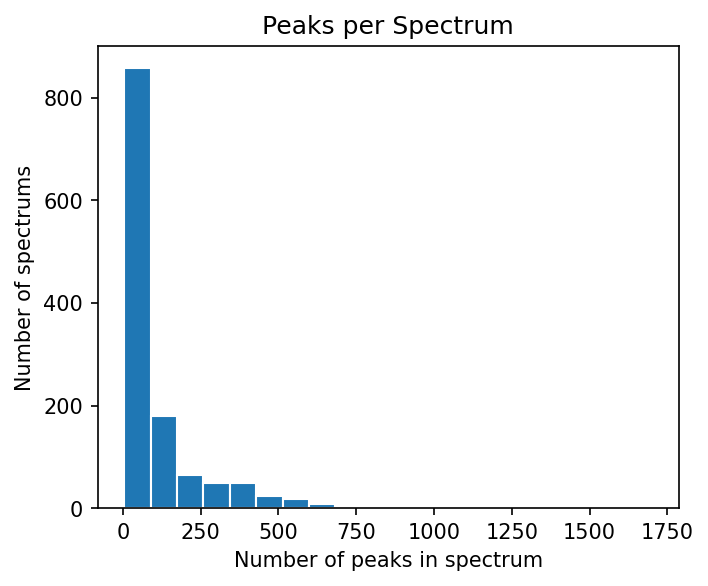

In [10]:
number_of_peaks = [len(s.peaks.mz) for s in spectrums]
from matplotlib import pyplot as plt
plt.figure (figsize=(5,4), dpi=150)
plt.hist (number_of_peaks, 20, edgecolor= 'white')
plt.title ('Peaks per Spectrum')
plt.xlabel('Number of peaks in spectrum')
plt.ylabel('Number of spectrums')

#### The filtering of peaks below 0.01 max intensity has drastically reduced the number of peaks per spectrum

### Comparing all spectra and finding similar ones
- Using 'Cosine score' to find (-nearly) identical spectra

In [11]:
from matchms import calculate_scores
from matchms.similarity import CosineGreedy
similarity_measure = CosineGreedy(tolerance=0.005)

In [12]:
len(spectrums)

1267

### For  all possible spectrum pairs (1267 x 1267 pairs), par i_j is the same as j_i, then "is_symmetry=True". 
Calculating about 800,000 cosine scores will take some minutes

In [13]:
scores = calculate_scores(spectrums, spectrums, similarity_measure, is_symmetric=True)

#### Inspecting the mathing peaks by 'matches' and for 'score'

In [14]:
scores.scores[:5, :5]["matches"]

array([[40,  2,  1,  4,  1],
       [ 2, 75,  2,  5,  1],
       [ 1,  2, 37,  4,  0],
       [ 4,  5,  4, 66,  0],
       [ 1,  1,  0,  0, 43]])

In [15]:
scores.scores[:5, :5]["score"]

array([[1.00000000e+00, 6.41050958e-03, 1.70386100e-04, 8.59172648e-04,
        2.35757313e-03],
       [6.41050958e-03, 1.00000000e+00, 1.37105333e-02, 9.45693252e-01,
        9.17922823e-05],
       [1.70386100e-04, 1.37105333e-02, 1.00000000e+00, 1.53604286e-02,
        0.00000000e+00],
       [8.59172648e-04, 9.45693252e-01, 1.53604286e-02, 1.00000000e+00,
        0.00000000e+00],
       [2.35757313e-03, 9.17922823e-05, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00]])

### To see the most similar spectra to the i-th spectrum, according to Cosine score
Top 5 candidates: cosine score and number of matching peaks

In [16]:
best_matches = scores.scores_by_query(spectrums[5], sort=True)[:5]
print([x[1] for x in best_matches])

[(1., 30), (0.99711049, 2), (0.99534901, 2), (0.99214557, 2), (0.98748381, 2)]


### To see the chemical structures of the compounds as smiles notations

In [17]:
[x[0].get("smiles") for x in best_matches]

['OC(COC(=O)c1ccccc1)C(O)C(O)COC(=O)c2ccccc2',
 'Cc1cc(=O)oc2cc(OC(=O)c3ccccc3)ccc12',
 'O=C(Nc1ccccc1OC(=O)c2ccccc2)c3ccccc3',
 'COc1cc(CC=C)ccc1OC(=O)c2ccccc2',
 'O=C(OCC1OC(C(OC(=O)c2ccccc2)C1OC(=O)c3ccccc3)n4ncc(=O)[nH]c4=O)c5ccccc5']

### For plotting the chemical structures of the first 5 candidates using rdkit

In [18]:
from rdkit import Chem
from rdkit.Chem import Draw
for i, smiles in enumerate([x[0].get("smiles") for x in    best_matches]):
    m = Chem.MolFromSmiles(smiles)
    Draw.MolToFile(m, f"compound_{i}.png")

#### Compound_0

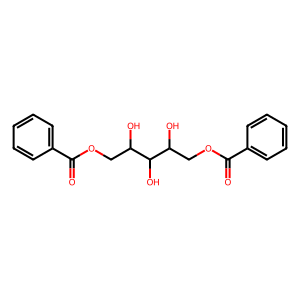

#### Compound_1

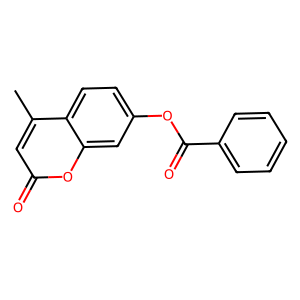

#### Compound_2

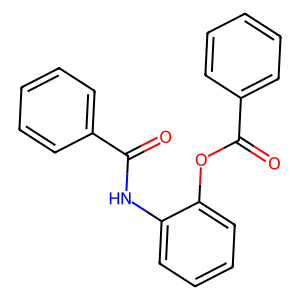

#### Compound_3

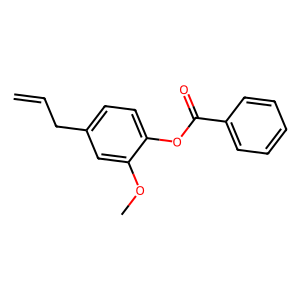

#### Compound _4

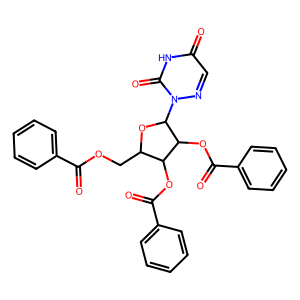